In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
train_data = pd.read_csv('/content/drive/MyDrive/credit card/fraudTest.csv', index_col=0)
test_data = pd.read_csv('/content/drive/MyDrive/credit card/fraudTest.csv', index_col=0)

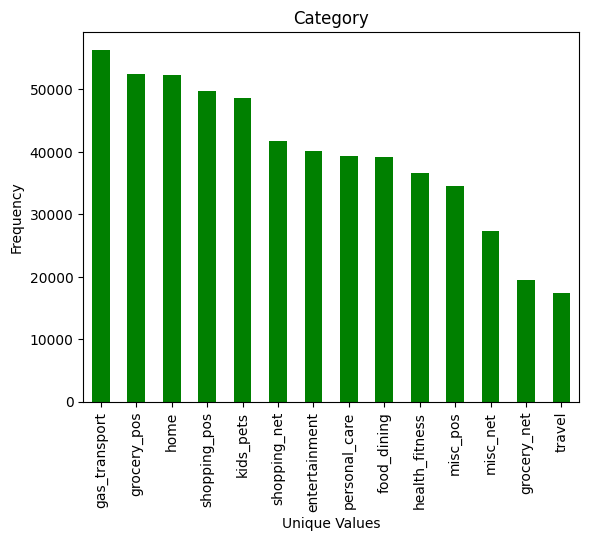

In [11]:
value_counts = train_data['category'].value_counts()
value_counts.plot(kind='bar', color='green')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Category')
plt.show()

In [3]:
# Drop irrelevant columns
train_data = train_data.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'], axis=1)

In [4]:
# Split the data into features and target variable
X = train_data.drop('is_fraud', axis=1)
y = train_data['is_fraud']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Apply SMOTE
smote = SMOTE(sampling_strategy=0.5)  # You can adjust the sampling strategy
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [6]:
# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.976741884402217
Confusion Matrix:
 [[108240   2478]
 [   107    319]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    110718
           1       0.11      0.75      0.20       426

    accuracy                           0.98    111144
   macro avg       0.56      0.86      0.59    111144
weighted avg       1.00      0.98      0.99    111144



In [7]:
from sklearn.tree import DecisionTreeClassifier
# Train a decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_resampled, y_resampled)

# Make predictions on the validation set
y_pred_tree = tree_model.predict(X_val)

# Evaluate the decision tree model
print("Decision Tree Model:")
print("Accuracy:", accuracy_score(y_val, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_tree))
print("Classification Report:\n", classification_report(y_val, y_pred_tree))

Decision Tree Model:
Accuracy: 0.9673576621320089
Confusion Matrix:
 [[107243   3475]
 [   153    273]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    110718
           1       0.07      0.64      0.13       426

    accuracy                           0.97    111144
   macro avg       0.54      0.80      0.56    111144
weighted avg       1.00      0.97      0.98    111144



In [8]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate the Random Forest model
print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))

Random Forest Model:
Accuracy: 0.9699309004534657
Confusion Matrix:
 [[107503   3215]
 [   127    299]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    110718
           1       0.09      0.70      0.15       426

    accuracy                           0.97    111144
   macro avg       0.54      0.84      0.57    111144
weighted avg       1.00      0.97      0.98    111144

